In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load Data
data = pd.read_csv('Key_indicator_districtwise.csv')
features = data.columns
y_labels = ['YY_Infant_Mortality_Rate_Imr_Total_Person']
rem_labels = ['YY_Infant_Mortality_Rate_Imr_Total_Person',
              'YY_Post_Neo_Natal_Mortality_Rate_Total',
            'YY_Neo_Natal_Mortality_Rate_Total',
            'YY_Infant_Mortality_Rate_Imr_Total_Female',
        'ZZ_Infant_Mortality_Rate_Total_Lower_Limit',
        'ZZ_Infant_Mortality_Rate_Total_Upper_Limit',
        'YY_Infant_Mortality_Rate_Imr_Total_Male',
        'YY_Post_Neo_Natal_Mortality_Rate_Rural',
       'ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit',
       'YY_Under_Five_Mortality_Rate_U5MR_Rural_Person',
       'YY_Under_Five_Mortality_Rate_U5MR_Rural_Male',
       'YY_Under_Five_Mortality_Rate_U5MR_Rural_Female',
       'ZZ_Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit',
       'YY_Under_Five_Mortality_Rate_U5MR_Total_Male',
       'YY_Under_Five_Mortality_Rate_U5MR_Total_Person',
       'ZZ_Under_Five_Mortality_Rate_U5MR_Total_Lower_Limit',
       'ZZ_Under_Five_Mortality_Rate_U5MR_Total_Upper_Limit',
       'YY_Under_Five_Mortality_Rate_U5MR_Total_Female',
       'YY_Neo_Natal_Mortality_Rate_Rural',
       'YY_Infant_Mortality_Rate_Imr_Rural_Female',
       'ZZ_Infant_Mortality_Rate_Rural_Lower_Limit',
       'ZZ_Infant_Mortality_Rate_Rural_Upper_Limit',
       'YY_Infant_Mortality_Rate_Imr_Rural_Person',
       'YY_Infant_Mortality_Rate_Imr_Rural_Male']
rem_indices = np.isin(features, rem_labels)
y = data[y_labels].values
x_raw = data.values
x_raw2 = x_raw[:,~rem_indices]
x_raw_labels = features[~rem_indices]
x1 = x_raw2.copy()
x_raw_labels1 = x_raw_labels.copy()

for i in range(17,0,-3):
    x1[:, i+1] = x1[:, i+1]/x1[:, i]
    x1[:, i+2] = x1[:, i+2]/x1[:, i]
    x1 = np.delete(x1, obj=i, axis=1)
    x_raw_labels1 = np.delete(x_raw_labels1, obj=1)

In [3]:
# make state and district categorical variables
states = pd.get_dummies(x_raw[:,0])
dists = pd.get_dummies(x_raw[:,1])
state_cols = states.columns
dists_cols = dists.columns
new_cols = np.append(state_cols, dists_cols)
new_vars = np.append(states, dists, axis=1)
# then append
x1 = np.delete(x1, obj=1, axis=1)
x1 = np.delete(x1, obj=0, axis=1)
x_raw_labels1 = np.delete(x_raw_labels1, obj=1)
x_raw_labels1 = np.delete(x_raw_labels1, obj=0)

#x_raw_labels1 = np.append(new_cols, x_raw_labels1)
#x_new = np.append(new_vars, x1, axis=1)
#x = x_new
#x_labels = x_raw_labels1
x = x1
x_labels = x_raw_labels1

In [4]:
# Remove NaNs (impute)
z = np.zeros(x.shape[1])
for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
        z[j] += np.isnan(x[i,j])

In [5]:
print(z.shape)
print(x.shape)
print(x_labels.shape)
x_no_nans = x[:,z == 0]
x_no_nans_labels = x_labels[z == 0]

(612,)
(284, 612)
(612,)


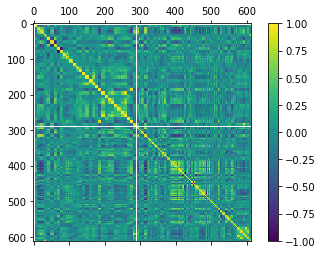

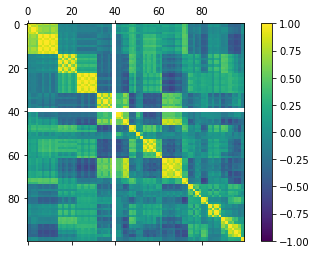

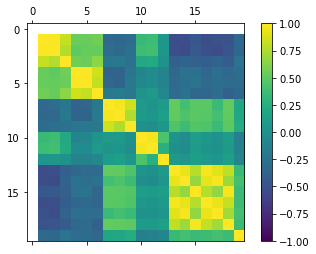

In [6]:
x_pandas = pd.DataFrame(x, columns=x_labels)
correlations = x_pandas.astype(float).corr()
fig1 = plt.figure()
ax = fig1.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig1.colorbar(cax)
plt.show()
fig2 = plt.figure()
ax = fig2.add_subplot(111)
cax = ax.matshow(correlations.iloc[250:350, 250:350], vmin=-1, vmax=1)
fig2.colorbar(cax)
plt.show()
fig3 = plt.figure()
ax = fig3.add_subplot(111)
cax = ax.matshow(correlations.iloc[290:310, 290:310], vmin=-1, vmax=1)
fig3.colorbar(cax)
plt.show()


In [7]:
x_pandas

,AA_Population_Total,AA_Population_Rural,AA_Population_Urban,AA_Ever_Married_Women_Aged_15_49_Years_Total,AA_Ever_Married_Women_Aged_15_49_Years_Rural,AA_Ever_Married_Women_Aged_15_49_Years_Urban,AA_Currently_Married_Women_Aged_15_49_Years_Total,AA_Currently_Married_Women_Aged_15_49_Years_Rural,AA_Currently_Married_Women_Aged_15_49_Years_Urban,AA_Children_12_23_Months_Total,...,ZZ_Infant_Mortality_Rate_Urban_Lower_Limit,ZZ_Infant_Mortality_Rate_Urban_Upper_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit,ZZ_Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Total_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Total_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Rural_Upper_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Lower_Limit,ZZ_Sex_Ratio_At_Birth_Urban_Upper_Limit
0,0,0,0,0,0,0,0.932302,0.067698,0.932553,0.067447,...,NaN,NaN,NaN,NaN,871,985,851,965,908,1611
1,0,0,0,0,0,0,0.869495,0.130505,0.873366,0.126634,...,NaN,NaN,NaN,NaN,897,1005,911,1026,621,956
2,0,0,0,0,0,0,0.881315,0.118685,0.880247,0.119753,...,25,49,31,57,891,966,871,949,905,1168
3,0,0,0,0,0,0,0.972898,0.0271018,0.971951,0.0280485,...,NaN,NaN,NaN,NaN,913,1102,908,1097,NaN,NaN
4,0,0,0,0,0,0,0.875203,0.124797,0.87634,0.12366,...,9,33,11,38,935,1045,938,1054,772,1083
5,0,0,0,0,0,0,0.906867,0.0931334,0.907981,0.0920194,...,NaN,NaN,NaN,NaN,868,998,864,998,716,1260
6,0,0,0,0,0,0,0.778489,0.221511,0.779731,0.220269,...,28,61,37,64,875,972,871,977,813,1046
7,0,0,0,0,0,0,0.922665,0.0773354,0.923599,0.076401,...,NaN,NaN,NaN,NaN,871,976,862,969,834,1319
8,0,0,0,0,0,0,0.887282,0.112718,0.886743,0.113257,...,NaN,NaN,NaN,NaN,893,1004,902,1020,713,1032
9,0,0,0,0,0,0,0.853259,0.146741,0.84914,0.15086,...,NaN,NaN,NaN,NaN,735,918,743,938,466,1018


In [8]:
#a = correlations.iloc[850:, 850:]
#correlations[correlations>0.8]
#fig1 = plt.figure()
#ax = fig1.add_subplot(111)
#cax = ax.matshow(a, vmin=-1, vmax=1)
#fig.colorbar(cax)
#plt.show()

In [9]:
x_no_nans[:,690:]
x_no_nans_labels[690:]

Index([], dtype='object')

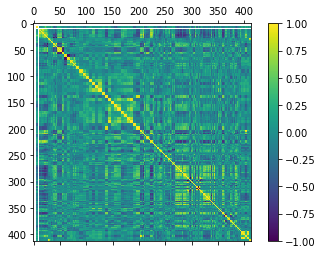

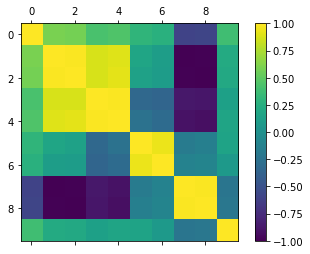

In [10]:
x_pandas_nonan = pd.DataFrame(x_no_nans, columns=x_no_nans_labels)
correlations_nonan = x_pandas_nonan.astype(float).corr()
fig2 = plt.figure()
ax = fig2.add_subplot(111)
cax = ax.matshow(correlations_nonan, vmin=-1, vmax=1)
fig2.colorbar(cax)
plt.show()
fig3 = plt.figure()
ax = fig3.add_subplot(111)
cax = ax.matshow(correlations_nonan.iloc[290:300,290:300], vmin=-1, vmax=1)
fig3.colorbar(cax)
plt.show()

In [11]:
#fig1.savefig('correlations1.png',  dpi = 1000)
fig2.savefig('correlations_nonan.png', dpi = 1000)

In [12]:
correlations_nonan.iloc[290:320,290:320]

,PP_Mothers_Who_Underwent_Ultrasound_Rural,QQ_Institutional_Delivery_Total,QQ_Institutional_Delivery_Rural,QQ_Delivery_At_Government_Institution_Total,QQ_Delivery_At_Government_Institution_Rural,QQ_Delivery_At_Private_Institution_Total,QQ_Delivery_At_Private_Institution_Rural,QQ_Delivery_At_Home_Total,QQ_Delivery_At_Home_Rural,QQ_Delivery_At_Home_Conducted_By_Skilled_Health_Personnel_Total,...,RR_Mothers_Who_Received_Post_Natal_Check_Up_Within_48_Hrs_Of_Delivery_Rural,RR_Mothers_Who_Received_Post_Natal_Check_Up_Within_1_Week_Of_Delivery_Total,RR_Mothers_Who_Received_Post_Natal_Check_Up_Within_1_Week_Of_Delivery_Rural,RR_Mothers_Who_Did_Not_Receive_Any_Post_Natal_Check_Up_Total,RR_Mothers_Who_Did_Not_Receive_Any_Post_Natal_Check_Up_Rural,RR_New_Borns_Who_Were_Checked_Up_Within_24_Hrs_Of_Birth_Total,RR_New_Borns_Who_Were_Checked_Up_Within_24_Hrs_Of_Birth_Rural,SS_Mothers_Who_Availed_Financial_Assistance_For_Delivery_Under_Jsy_Total,SS_Mothers_Who_Availed_Financial_Assistance_For_Delivery_Under_Jsy_Rural,SS_Mothers_Who_Availed_Financial_Assistance_For_Institutional_Delivery_Under_Jsy_Total
PP_Mothers_Who_Underwent_Ultrasound_Rural,1.000000,0.600085,0.584918,0.423137,0.452015,0.312398,0.267236,-0.595868,-0.580619,0.390331,...,0.397798,0.424664,0.405739,-0.433172,-0.410007,0.434623,0.411237,0.385462,0.428549,0.024756
QQ_Institutional_Delivery_Total,0.600085,1.000000,0.990493,0.875034,0.902323,0.174557,0.115213,-0.996237,-0.984917,0.223561,...,0.580594,0.615555,0.598221,-0.603534,-0.582401,0.615095,0.587238,0.841063,0.881264,0.356051
QQ_Institutional_Delivery_Rural,0.584918,0.990493,1.000000,0.882560,0.916437,0.143097,0.104923,-0.988411,-0.996132,0.206245,...,0.593784,0.611062,0.607943,-0.605923,-0.599807,0.622743,0.609935,0.847623,0.891340,0.384241
QQ_Delivery_At_Government_Institution_Total,0.423137,0.875034,0.882560,1.000000,0.986776,-0.322944,-0.348631,-0.873359,-0.879512,0.136109,...,0.396538,0.442538,0.435219,-0.435789,-0.425535,0.433507,0.419340,0.977220,0.968360,0.723852
QQ_Delivery_At_Government_Institution_Rural,0.452015,0.902323,0.916437,0.986776,1.000000,-0.242862,-0.301053,-0.902137,-0.914319,0.168393,...,0.444996,0.481605,0.478568,-0.477130,-0.471752,0.481875,0.469598,0.961152,0.979725,0.670630
QQ_Delivery_At_Private_Institution_Total,0.312398,0.174557,0.143097,-0.322944,-0.242862,1.000000,0.941701,-0.170875,-0.138708,0.162461,...,0.334091,0.306071,0.288385,-0.296022,-0.276871,0.325649,0.301687,-0.343461,-0.247795,-0.775151
QQ_Delivery_At_Private_Institution_Rural,0.267236,0.115213,0.104923,-0.348631,-0.301053,0.941701,1.000000,-0.110997,-0.101301,0.074248,...,0.312265,0.259797,0.261115,-0.257847,-0.257856,0.289183,0.290874,-0.368521,-0.311460,-0.747495
QQ_Delivery_At_Home_Total,-0.595868,-0.996237,-0.988411,-0.873359,-0.902137,-0.170875,-0.110997,1.000000,0.990140,-0.224047,...,-0.579877,-0.613957,-0.597721,0.609948,0.589536,-0.617029,-0.590304,-0.841889,-0.882795,-0.359577
QQ_Delivery_At_Home_Rural,-0.580619,-0.984917,-0.996132,-0.879512,-0.914319,-0.138708,-0.101301,0.990140,1.000000,-0.205866,...,-0.594074,-0.609961,-0.608826,0.611909,0.607461,-0.624185,-0.613506,-0.846482,-0.890738,-0.386465
QQ_Delivery_At_Home_Conducted_By_Skilled_Health_Personnel_Total,0.390331,0.223561,0.206245,0.136109,0.168393,0.162461,0.074248,-0.224047,-0.205866,1.000000,...,0.201238,0.258709,0.240189,-0.260421,-0.240483,0.200011,0.173661,0.146904,0.178204,0.021315


In [13]:
split = int(x_no_nans.shape[0]*0.9)
x_no_nans_train = x_no_nans[:split]
x_no_nans_test = x_no_nans[split:]
y_train = y[:split]
y_test = y[split:]

In [14]:
clf = BayesianRidge(compute_score=True, normalize=True)
clf.fit(x_no_nans_train, y_train)

ols = LinearRegression(normalize=True)
ols.fit(x_no_nans_train, y_train)

//anaconda/envs/python27/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [15]:
bayesian_coefs = clf.coef_
sorted_coefs = np.sort(np.abs(bayesian_coefs))
sorted_indices = np.argsort(np.abs(bayesian_coefs))
sorted_labels = x_no_nans_labels[sorted_indices]
sorted_labels[-100:]
for el in sorted_labels[-10:]:
    print el

ZZ_Crude_Death_Rate_Rural_Upper_Limit
YY_Crude_Death_Rate_Cdr_Rural_Female
YY_Crude_Death_Rate_Cdr_Total_Female
NN_Current_Usage_Emergency_Contraceptive_Pills_Rural
LL_Mean_Number_Of_Children_Surviving_To_Women_Aged_15_49_Years_Rural
MM_Average_Month_Of_Pregnancy_At_The_Time_Of_Abortion_Total
AA_Currently_Married_Women_Aged_15_49_Years_Rural
AA_Currently_Married_Women_Aged_15_49_Years_Total
AA_Children_12_23_Months_Total
AA_Currently_Married_Women_Aged_15_49_Years_Urban


In [16]:
least_sq = ols.coef_
ols_sorted_coefs = np.sort(np.abs(least_sq))
ols_sorted_indices = np.argsort(np.abs(least_sq))
ols_sorted_labels = x_no_nans_labels[ols_sorted_indices]
ols_sorted_labels[0,-100:]
for el in ols_sorted_labels[0,-10:]:
    print el

ZZ_Crude_Death_Rate_Rural_Upper_Limit
VV_Average_Month_By_Which_Children_Received_Foods_Other_Than_Breast_Milk_Semi_Solid_Mashed_Food_Rural
LL_Median_Age_At_First_Live_Birth_Of_Women_Aged_15_49_Years_Rural
BB_Average_Household_Size_Sc_Total
NN_Current_Usage_Emergency_Contraceptive_Pills_Rural
AA_Children_12_23_Months_Total
AA_Currently_Married_Women_Aged_15_49_Years_Urban
NN_Current_Usage_Emergency_Contraceptive_Pills_Total
LL_Mean_Number_Of_Children_Surviving_To_Women_Aged_15_49_Years_Rural
LL_Mean_Number_Of_Children_Surviving_To_Women_Aged_15_49_Years_Total


In [17]:
print(len(set(list(ols_sorted_labels[0,-100:])+list(sorted_labels[-100:]))))
print(len(np.intersect1d(ols_sorted_labels[0,-20:], sorted_labels[-10:])))
print(len(np.intersect1d(ols_sorted_labels[0,-10:], sorted_labels[-20:])))
print(len(np.intersect1d(ols_sorted_labels[0,-10:], sorted_labels[-10:])))
np.intersect1d(ols_sorted_labels[0,-10:], sorted_labels[-10:])

129
5
5
5


array(['AA_Children_12_23_Months_Total',
       'AA_Currently_Married_Women_Aged_15_49_Years_Urban',
       'LL_Mean_Number_Of_Children_Surviving_To_Women_Aged_15_49_Years_Rural',
       'NN_Current_Usage_Emergency_Contraceptive_Pills_Rural',
       'ZZ_Crude_Death_Rate_Rural_Upper_Limit'], dtype=object)

In [18]:
ols_yhat = ols.predict(x_no_nans_test)
clf_yhat = clf.predict(x_no_nans_test)

print(ols.score(x_no_nans_test, y_test))
print(clf.score(x_no_nans_test, y_test))

print(ols.score(x_no_nans_train, y_train))
print(clf.score(x_no_nans_train, y_train))


-0.135315658791
0.670084344816
1.0
0.792663816516
